In [ ]:
!pip install pydub

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile
from scipy.fft import fftshift
from pydub import AudioSegment
from tempfile import mktemp

In [ ]:
mp3_audio = AudioSegment.from_file('sound.mp3', format="mp3")  # read mp3
sound = mp3_audio.set_channels(1)
sound.export("now2.wav", format="wav")

<_io.BufferedRandom name='now2.wav'>

In [ ]:
fs, audio = wavfile.read('now2.wav')
sample = len(audio)
t = np.arange(0, sample/fs, 1/fs)
print("Frecuencia:", fs)
print("Sample:", sample)
print("vector tiempo:", t)

Frecuencia: 44100
Sample: 226944
vector tiempo: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 5.14605442e+00
 5.14607710e+00 5.14609977e+00]


In [ ]:
audio

array([ 0, -1,  0, ..., -6, -4, -4], dtype=int16)

Text(0.5, 1.0, 'Audio en el dominio del tiempo')

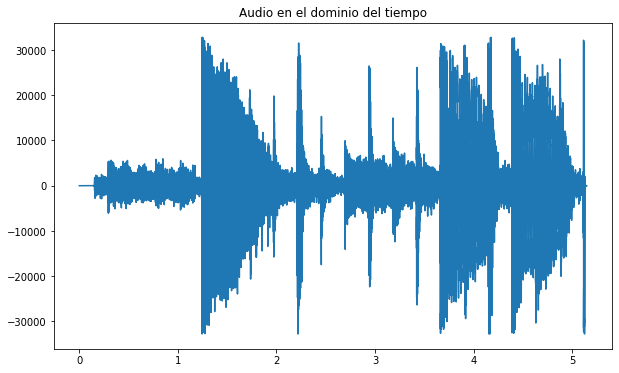

In [ ]:
plt.plot(t, audio)
plt.title("Audio en el dominio del tiempo")

In [ ]:
IPython.display.Audio(audio, rate=fs)

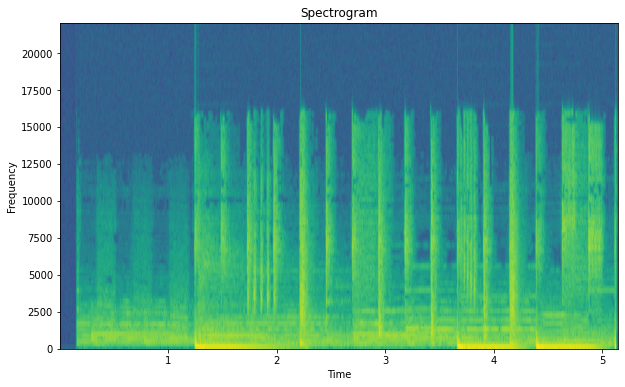

In [ ]:
plt.rcParams["figure.figsize"]=[10,6]
#plt.specgram(audio, NFFT=1024, Fs=fs, noverlap=512)
plt.specgram(audio, Fs=fs)
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.rcParams["figure.figsize"]=[10,6]
plt.specgram(audio, NFFT=1024, Fs=fs, noverlap=512)
#plt.specgram(audio, Fs=fs)
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

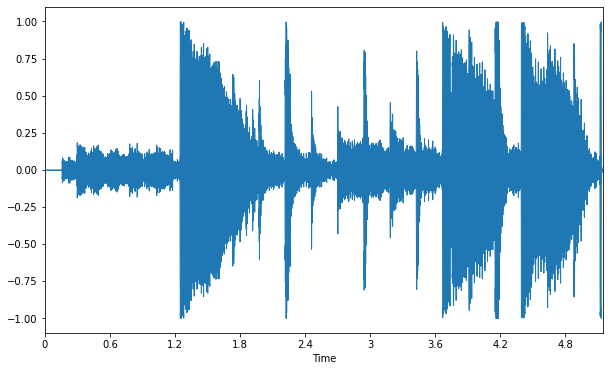

In [ ]:
import librosa
import librosa.display
plt.rcParams["figure.figsize"]=[10,6]
filename = "now2.wav"
y, sr = librosa.load(filename, sr=None)
librosa.display.waveplot(y, sr=sr)

In [ ]:
sr

44100

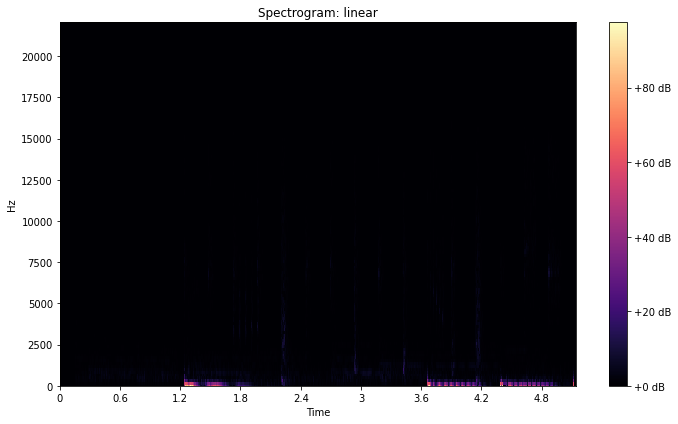

In [ ]:
import numpy as np
plt.rcParams["figure.figsize"]=[10,6]

n_fft = 256
hop_length = int(n_fft/4)
D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=None, window="bohman"))
librosa.display.specshow(D, y_axis="linear", x_axis="time", sr=sr, hop_length=hop_length)
plt.title("Spectrogram: linear")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

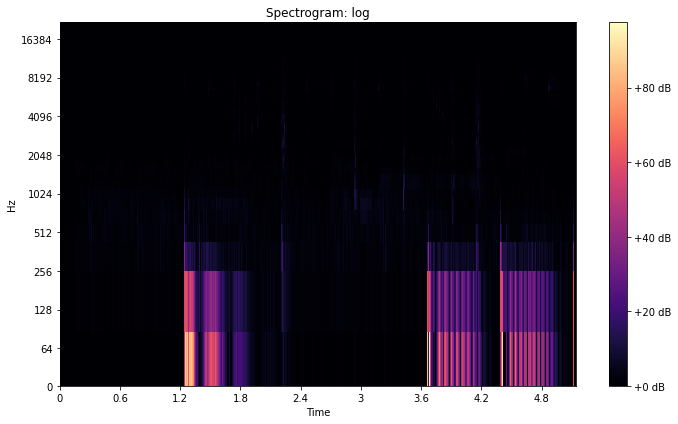

In [ ]:
librosa.display.specshow(D, y_axis="log", x_axis="time", sr=sr, hop_length=hop_length)
plt.title("Spectrogram: log")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()